
# Variational Inference: ELBO, KL, and log Z on One Plot (Toy Example)

This notebook is a small extension of **VI_ELBO_Toy.ipynb**.

Goal:
- plot **log Z**, **ELBO(θ)**, and **KL(qθ‖p)** on *one* figure and visually confirm
  \[
  \log Z = \mathrm{ELBO}(\theta) + \mathrm{KL}(q_\theta\|p).
  \]

Model:
\[
\tilde p(x)=\exp(\beta x),\quad x\in\{-1,+1\},\qquad p(x)=\tilde p(x)/Z.
\]
Variational family:
\[
q_\theta(x=+1)=\theta,\quad q_\theta(x=-1)=1-\theta.
\]


In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt

os.makedirs("figs", exist_ok=True)


In [2]:

def logZ(beta):
    return np.log(np.exp(beta) + np.exp(-beta))  # = log(2 cosh beta)

def p_plus(beta):
    Z = np.exp(beta) + np.exp(-beta)
    return np.exp(beta)/Z

def elbo(theta, beta):
    # E_q[log \tilde p] - E_q[log q]
    eq_log_tilde = theta*beta + (1-theta)*(-beta)
    eps=1e-12
    ent = -(theta*np.log(theta+eps) + (1-theta)*np.log(1-theta+eps))
    return eq_log_tilde + ent

def kl_q_p(theta, beta):
    p = p_plus(beta)
    eps=1e-12
    q1=theta; q0=1-theta
    p1=p; p0=1-p
    return q1*np.log((q1+eps)/(p1+eps)) + q0*np.log((q0+eps)/(p0+eps))


In [3]:

beta = 1.5
thetas = np.linspace(1e-4, 1-1e-4, 800)

LZ = logZ(beta)
EL = np.array([elbo(t,beta) for t in thetas])
KL = np.array([kl_q_p(t,beta) for t in thetas])

# Identity check
residual = LZ - (EL + KL)
print("max |logZ - (ELBO + KL)| =", np.max(np.abs(residual)))


max |logZ - (ELBO + KL)| = 2.1082691148421873e-11


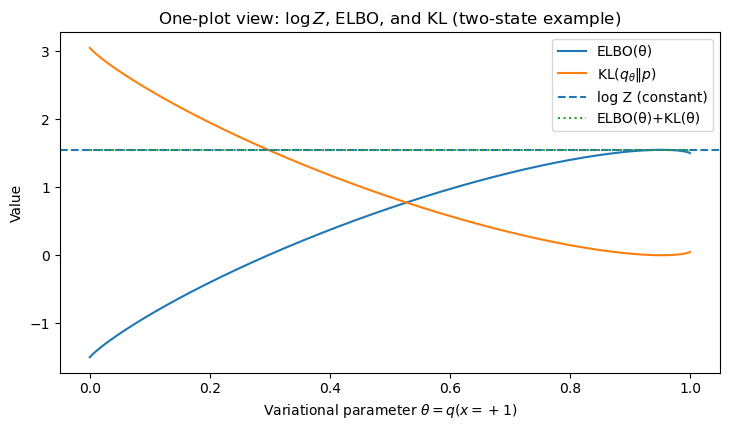

In [4]:

# One combined plot
plt.figure(figsize=(7.4,4.4))
plt.plot(thetas, EL, label="ELBO(θ)")
plt.plot(thetas, KL, label=r"KL$(q_\theta\|p)$")
plt.axhline(LZ, linestyle="--", label="log Z (constant)")
plt.plot(thetas, EL+KL, linestyle=":", label="ELBO(θ)+KL(θ)")

plt.xlabel(r"Variational parameter $\theta = q(x=+1)$")
plt.ylabel("Value")
plt.title(r"One-plot view: $\log Z$, ELBO, and KL (two-state example)")
plt.legend()
plt.tight_layout()
plt.savefig("figs/elbo_kl_logZ_combined.png", dpi=150)
plt.show()



## Reading the plot

- The dashed line is the **true** $\log Z$.
- The dotted curve **ELBO+KL** lies on top of $\log Z$ (up to numerical error).
- ELBO stays below $\log Z$; the vertical gap is exactly the KL divergence.
